In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.compose import make_column_transformer

In [8]:
data = pd.read_csv(r'C:\Users\burne\Desktop\IBM Data Science Certificate\Customer Churn Model\churndata.csv')

In [9]:
# Data processing
data = data.iloc[:, 1:] # removes first column with id's
X_raw = data.iloc[:,:-1] # creates feature matrix without churn


In [10]:
# Use this command to do a value count of selected columns
X_raw['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [11]:
# One hot encoding
encoder = OneHotEncoder(sparse = False)
column_trans = make_column_transformer((encoder, ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']), remainder = 'passthrough')
#encoder.fit_transform(X_raw[['PaymentMethod']])
#encoder.categories_
# NEW feature matrix
X = column_trans.fit_transform(X_raw)

In [12]:
#encoder.categories_

In [13]:
# Binary encode churn
target = data.iloc[:,-1:]
y = target.apply(LabelEncoder().fit_transform)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [15]:
# Hyperprameter tuning
#params = {'max_depth' : list(range(1,11))}
#'min_samples_leaf' : [75,80,85,90,100,110,120],
#'min_samples_split': [1,2,3,4,5,8]}
#gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=6), params,verbose=1, cv=5, n_jobs=-1, scoring = 'roc_auc')


In [16]:
#clf = DecisionTreeClassifier(max_depth=6,min_samples_leaf=75,min_samples_split=2, random_state=5)
clf = DecisionTreeClassifier(max_depth=5, random_state=5)


In [17]:
# Fit model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=5)

In [20]:
#clf.best_params_

In [21]:
#clf.best_estimator_

In [22]:
# Check overfitting by predicting the training set. Single iteration.
predict_train = clf.predict(X_train) # predict for training set
acc = accuracy_score(y_train, predict_train)
pre = precision_score(y_train, predict_train)
rec = recall_score(y_train, predict_train)
print('TRAIN SET SINGLE prediction scores:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TRAIN SET SINGLE prediction scores:
Accuracy score = 0.8715969118244616
Precision score = 0.7902097902097902
Recall score = 0.6975308641975309


In [23]:
# Scores for single iteration of test data
predict = clf.predict(X_test) 
acc = accuracy_score(y_test, predict)
pre = precision_score(y_test, predict)
rec = recall_score(y_test, predict)
print('TEST SET SINGLE:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TEST SET SINGLE:
Accuracy score = 0.8488151658767773
Precision score = 0.7529880478087649
Recall score = 0.6596858638743456


In [24]:
# 10 fold Cross validation predict scores on hold out dataset 
#a = clf.best_estimator_

y_predict = cross_val_predict(clf, X_test,y_test, cv =10)
acc = accuracy_score(y_test, y_predict)
pre = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
print('TEST SET 10 FOLD CV (hold out data set)\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TEST SET 10 FOLD CV (hold out data set)
Accuracy score = 0.8440758293838863
Precision score = 0.7067796610169491
Recall score = 0.7277486910994765


In [25]:
scores = cross_val_score(a, X_test, y_test, cv=10, scoring = 'recall')
scores

NameError: name 'a' is not defined

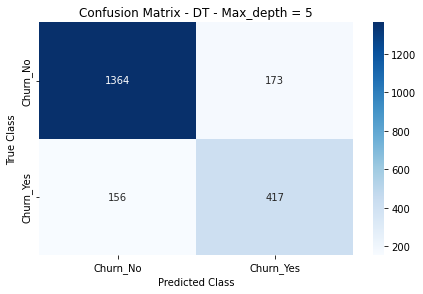

In [26]:
matrix = confusion_matrix(y_test, y_predict)
# Plot confusion Matrix
class_names = ['Churn_No', 'Churn_Yes']
dataframe_Confusion =  pd.DataFrame(matrix, index=class_names, columns=class_names) 

sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix - DT - Max_depth = 5")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

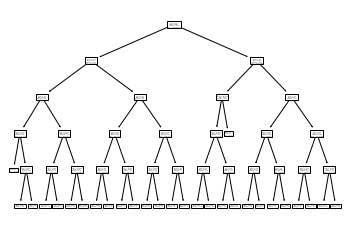

In [27]:
plot_tree(clf)
plt.show()

In [28]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.90      0.89      0.89      1537\n           1       0.71      0.73      0.72       573\n\n    accuracy                           0.84      2110\n   macro avg       0.80      0.81      0.80      2110\nweighted avg       0.85      0.84      0.84      2110\n'